# Homework 5


In [1]:
# import common
import pandas as pd
import numpy as np
from scipy import stats

import seaborn as sns
import matplotlib.pylab as plt
from statsmodels.stats import weightstats
from statsmodels.stats import proportion

#### 1. Par사는 골프용품을 생산하는 대기업이다. 기존의 제품에 비해 신제품이 내구성을 향상시키면서 손색없는 비거리를 보일 수 있는 골프공의 생산에 관심이 있다. 두 제품 간의 비거리를 비교하기 위해서 각각 40개의 골프공을 추출하여 비거리를 측정하였다. 비거리의 측정 결과는 golf.csv에 수록되어 있다. 

#### (a) 기존 제품과 신제품 간의 비거리를 비교하는데 활용할 수 있는 가설을 제시하시오.

In [2]:
golf_data_path = "C:\\Users\\nlpla\\Downloads\\Golf.csv"
golf = pd.read_csv(golf_data_path)

In [3]:
golf.head()

,Current,New
0,264,277
1,261,269
2,267,263
3,272,266
4,258,262


In [4]:
# two sample t - test
# H_0: mu_1 = mu_2 (mu_1 - mu_2 = 0)
# H_1: mu_1 != mu_2 (mu_1 - mu_2 != 0)

#### (b) 가설검정을 수행할 수 있도록 자료를 분석하시오. P값은 얼마이며 이 결과에 대하여 Par사에 어떤 자문을 할 수 있겠는가?

In [9]:
# 가정체크
# (n1+n2 > 30)
stats.bartlett(golf["Current"],golf["New"])

BartlettResult(statistic=0.5794722763744089, pvalue=0.4465192461067067)

In [6]:
# 등분산이 만족됨

In [10]:
res = stats.ttest_ind(golf["Current"],golf["New"],equal_var=True) # alternative  = 'larger'
print(res)
#print(f'p-alue for single sided test: {res.pvalue / 2:.4f}') 

Ttest_indResult(statistic=1.3283615935245678, pvalue=0.18793228491854663)


In [8]:
# 비거리의 차이가 없다. 

#### (c) 각 모델의 모집단 평균에 대한 95% 신뢰구간은 얼마인가? 두 신뢰구간이 겹치는가? 위의 가설검정 결과와 비교하여 서술하시오.

In [14]:
weightstats.DescrStatsW(golf["Current"]).tconfint_mean(alpha=0.05)

(267.47565965314044, 273.0743403468595)

In [15]:
weightstats.DescrStatsW(golf["New"]).tconfint_mean(alpha=0.05)

(264.3348164103898, 270.6651835896102)

In [ ]:
# 귀무가설 채택(겹치면) --> 이거 체크 필요

#### 2. 고혈압 환자 120명을 대상으로 치료 전후의 혈압이 blood_pressure.csv에 저장되어 있다. 해당 치료가 효과가 있는지 (즉, 치료 후의 혈압이 감소했는지) 가설검정 절차를 통해 답하시오. 

In [18]:
blood_data_path = "C:\\Users\\nlpla\\Downloads\\blood_pressure.csv"
blood = pd.read_csv(blood_data_path)
blood.head()

,patient,sex,agegrp,bp_before,bp_after
0,1,Male,30-45,143,153
1,2,Male,30-45,163,170
2,3,Male,30-45,153,168
3,4,Male,30-45,153,142
4,5,Male,30-45,146,141


In [19]:
# paried t-test
blood["diff"]= blood.bp_after - blood.bp_before

In [ ]:
# H0: mu_d = 0
# H1: mu_d < 0 (혈압이 감소)
# 가정체크 
# 표본 수가 > 30 

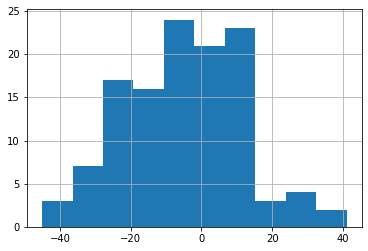

In [21]:
blood["diff"].hist()

In [26]:
stat = weightstats.DescrStatsW(blood["diff"]) 
stat.ttest_mean(value=0, alternative="smaller") 

(-3.3371870510833657, 0.0005648957322420411, 119.0)

#### 3.	시카고 O’Hare 공항과 애틀란타의 Hartsfield-Jackson공항은 미국에서 가장 번잡한 공항들 중에 하나이다. 이렇게 붐비는 관계로 종종 도착과 이륙 지연이 발생한다. 예정보다 15분 지체되면 지연으로 고려된다. 시카고 O’Hare공항은 지난 달 900편 중 252편이 이륙지연되었고 애틀란타의 Hartsfield-Jackson공항은 1200편 중 312편이 이륙지연 되었다. 두 공항의 출발지연에 대한 모집단 비율의 차이가 있는지 판단하기 위해 가설검정을 진행하시오.

In [33]:
252 / 900

0.28

In [35]:
312 / 1200

0.26

In [32]:
# 252 / 900
# 312 / 1200
# H0: p1 = p2
# H1: p1 != p2
from statsmodels.stats import proportion
test_result = proportion.proportions_ztest(count = [252,312], nobs = [900,1200], alternative = 'two-sided') 
print(test_result)

(1.0233315429559044, 0.30615111466303746)


#### 4. 올해 초 13주 동안 토요일 저녁 뉴스의 시청률이 MBC방송은 29%, KBS방송은 28%, SBS 방송은25%, 기타 방송사가 18%로 기록되었다. 토요일 저녁 방송 편성이 변경되고 난 다음에 300가구를 선정하여 시청률을 조사한 결과에 따르면 MBC 95가구, KBS 70가구, SBS 89가구, 기타 방송이 46가구를 기록하였다. 유의수준 0.05 하에서 시청률에 변경이 있었다고 할 수 있는지 통계적 판단을 하시오.

In [ ]:
# H0: p1=0.29, p2=0.28, p3=0.25, p4=0.18
# H1: 위의 p들 중 하나는 달라진다. 

In [40]:
from scipy.stats import chisquare
xo=[95,70,89,46]
xe=np.array([0.29, 0.28, 0.25, 0.18])*300
xe

array([87., 84., 75., 54.])

In [41]:
result = chisquare(xo, f_exp=xe)
result

Power_divergenceResult(statistic=6.867484035759902, pvalue=0.07624361547108675)